# Coral Triangle case study

- BLM calibration (There is no grid)
- Solutions clustering
- Gap Analysis
- Unmet targtes pipeline
- FPF calibration (Targets met)
- Difference Map (There is no grid)

Date: 20 April 2021  
Author: tamara.huete@vizzuality.com

### 1. Requirements

In [23]:
%run marxan_utils.ipynb

### 2. MARXAN folder

In [2]:
MARXAN_FOLDER = '/home/jovyan/work/datasets/raw/demo_Coral_Triangle/marxan_Coral_Triangle_Case_Study'
MARXAN_INPUTDATA = 'input.dat'

### 3. BLM calibration (no grid file, can't calculate area to apply rule of thumb)

In [ ]:
grid_file_path = f'{MARXAN_FOLDER}/pulayer/pu_base.shp'
BLM_calibration(MARXAN_FOLDER,'input.dat',grid_file_path )

## Execute marxan

In [3]:
#execute marxan
userInputFile = readInput(MARXAN_FOLDER, MARXAN_INPUTDATA)
userInputFile.VERBOSITY = 3
saveInput(MARXAN_FOLDER, MARXAN_INPUTDATA,userInputFile)

In [9]:
execute_marxan(MARXAN_FOLDER)

Marxan v 4.0.5

Spatial Prioritization via Annealing

Coded by Ian Ball, modified by Matthew Watts
Written by Ian Ball and Hugh Possingham

Marxan website

https://marxansolutions.org/

Running multithreaded over number of threads: 4

Best run: 73 Best score: 3.84283e+07


### SCENARIO OUTPUTS

### 3) Solutions clustering

In [10]:
bestsols= clusterSolutions(MARXAN_FOLDER,'input.dat',k=5)
bestsols

Overall best solution is 73


[45, 59, 73, 77, 63]

#### Summary info 5 most different solutions

In [11]:
summary = validateFile(MARXAN_FOLDER,'input.dat',OutputSum)
sum_diff =summary[summary['Run_Number'].isin(bestsols)]
sum_diff

,Run_Number,Score,Cost,Planning_Units,Connectivity,Connectivity_Total,Connectivity_In,Connectivity_Edge,Connectivity_Out,Connectivity_In_Fraction,Penalty,Shortfall,Missing_Values,MPM
44,45,39933000.0,39932800.0,3232,55100000.0,237740000.0,13870000.0,55100000.0,168770000.0,0.058341,129.039,9469.26,1,0.999994
58,59,38899000.0,38898800.0,3247,55890000.0,237740000.0,13630000.0,55890000.0,168220000.0,0.057332,220.647,10930.40,5,0.999995
62,63,39254200.0,39254000.0,3293,55960000.0,237740000.0,14140000.0,55960000.0,167640000.0,0.059477,181.734,7684.01,4,0.999992
72,73,38428300.0,38428000.0,3364,56420000.0,237740000.0,14900000.0,56420000.0,166420000.0,0.062673,320.607,32756.50,6,0.999994
76,77,40334900.0,40334600.0,3251,56410000.0,237740000.0,13080000.0,56410000.0,168250000.0,0.055018,210.248,9794.29,4,0.999995


### 4) Gap Analysis

In [12]:
df = gapAnalysis(MARXAN_FOLDER, 'input.dat')

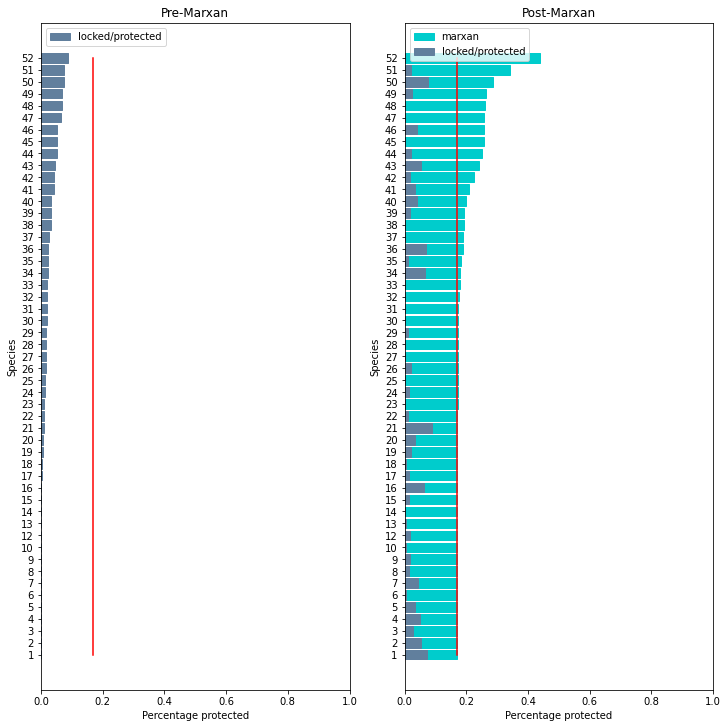

In [13]:
fig, anx = plt.subplots(nrows=1, ncols=2,figsize=(10,10), constrained_layout=True)
plotGap(df, 'Pre-Marxan', anx[0], post_marxan=False)
plotGap(df, 'Post-Marxan', anx[1], post_marxan=True)

### 5) Unmet targets pipeline

In [15]:
unmet_dict = unmetDecisionTree(MARXAN_FOLDER, 'input.dat',
                      lock_out_limit=50, 
                      high_cost_quantile= 0.7, 
                      hcost_limit=20)

In [16]:
unmet_dict

{1: 'Close to target (1% away of misslevel)',
 2: 'Close to target (1% away of misslevel)',
 5: 'Close to target (1% away of misslevel)',
 6: 'Close to target (1% away of misslevel)',
 7: 'Close to target (1% away of misslevel)',
 9: 'Close to target (1% away of misslevel)'}

 --> Running FPF_1...
Marxan v 4.0.5

Spatial Prioritization via Annealing

Coded by Ian Ball, modified by Matthew Watts
Written by Ian Ball and Hugh Possingham

Marxan website

https://marxansolutions.org/

Running multithreaded over number of threads: 4

Best run: 1 Best score: 3.89587e+07
 --> Running FPF_2...
Marxan v 4.0.5

Spatial Prioritization via Annealing

Coded by Ian Ball, modified by Matthew Watts
Written by Ian Ball and Hugh Possingham

Marxan website

https://marxansolutions.org/

Running multithreaded over number of threads: 4

Best run: 2 Best score: 4.01685e+07
 --> Running FPF_5...
Marxan v 4.0.5

Spatial Prioritization via Annealing

Coded by Ian Ball, modified by Matthew Watts
 --> Running FPF_10...
Marxan v 4.0.5

Spatial Prioritization via Annealing

Coded by Ian Ball, modified by Matthew Watts
Written by Ian Ball and Hugh Possingham

Marxan website

https://marxansolutions.org/
 --> Running FPF_20...
Marxan v 4.0.5

Spatial Prioritization via Annealing

Coded by

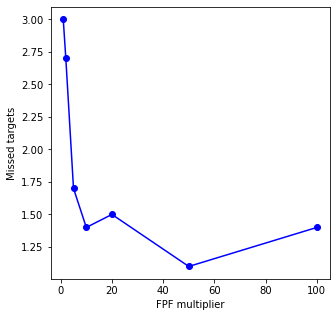

In [24]:
best_multiplier = FPF_calibration(f'{MARXAN_FOLDER}',MARXAN_INPUTDATA, unmet_dict)

In [25]:
best_multiplier

50